<a href="https://colab.research.google.com/github/IlyaZutler/Project-OpenWeather/blob/main/beginings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# !pip install streamlit
# !pip install requests
# !pip install json
# !pip install datetime
# !pip install pandas
# !pip install pytz
# !pip install sys
# !pip install IPython



# import streamlit as st
import datetime
import base64
import requests
import json
import matplotlib.pyplot as plt
from IPython import get_ipython
import pandas as pd



In [ ]:
def get_defolt_parametrs(url):
    response = requests.get(url)

    if response.status_code == 200:
        return json.loads(response.text)
    else:
        return None

In [ ]:
def get_weather(city, units, key):
    api_url = "http://api.openweathermap.org/data/2.5/forecast"

    response = requests.get(api_url, params={"q": city, "units": units, "appid": key})
    data = response.json()
    return data


In [22]:
print(data['cod'])
if data['cod'] == '404':
    print('city not found')

200


In [ ]:
data

In [ ]:
data['list'][0]

{'dt': 1717524000,
 'main': {'temp': 17.25,
  'feels_like': 16.88,
  'temp_min': 15.8,
  'temp_max': 17.25,
  'pressure': 1008,
  'sea_level': 1008,
  'grnd_level': 1004,
  'humidity': 71,
  'temp_kf': 1.45},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'clouds': {'all': 83},
 'wind': {'speed': 5.34, 'deg': 264, 'gust': 9.34},
 'visibility': 10000,
 'pop': 0,
 'sys': {'pod': 'd'},
 'dt_txt': '2024-06-04 18:00:00'}

In [ ]:
def data_to_lists(data):
    dt_txt = []
    temp = []
    temp_min = []
    temp_max = []
    humidity = []
    description = []
    for i in range(len(data['list'])):
        dt_txt.append(data['list'][i]['dt_txt'])
        temp.append(data['list'][i]['main']['temp'])
        temp_min.append(data['list'][i]['main']['temp_min'])
        temp_max.append(data['list'][i]['main']['temp_max'])
        humidity.append(data['list'][i]['main']['humidity'])
        description.append(data['list'][i]['weather'][0]['description'])
    return dt_txt, temp, temp_min, temp_max, humidity, description
dt_txt, temp, temp_min, temp_max, humidity, description = data_to_lists(data)
print(humidity)



[71, 81, 79, 72, 65, 43, 37, 40, 50, 64, 67, 75, 68, 57, 39, 39, 45, 60, 77, 71, 67, 49, 57, 67, 73, 75, 83, 91, 74, 51, 43, 49, 44, 64, 76, 76, 71, 53, 39, 44]


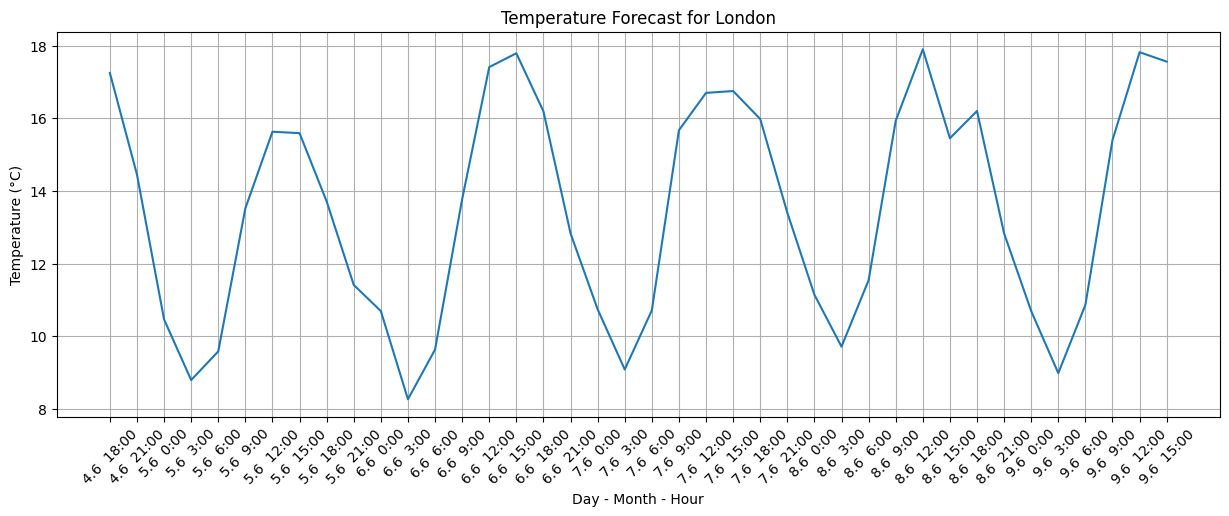

In [ ]:
import matplotlib.pyplot as plt
#import numpy as np
import datetime

# Convert dt_txt to datetime objects
dt_txt_datetime = []
for date_str in dt_txt:
    dt_txt_datetime.append(datetime.datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S'))

# Extract month, day, and hour from datetime objects
day_month_hour = []
for date in dt_txt_datetime:
    day_month_hour.append(f'{date.day}.{date.month}  {date.hour}:00')

# Plot temperature vs. month-day-hour
plt.figure(figsize=(15, 5))
plt.plot(day_month_hour, temp)
plt.xlabel('Day - Month - Hour')
plt.ylabel('Temperature (°C)')
plt.title(f'Temperature Forecast for {city}')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


In [24]:
city_timezone = data['city']['timezone']

def time_in_the_city(city_timezone):
    # Get the current time in UTC
    utc_now = datetime.datetime.utcnow()

    # Create a timezone object with an offset of 'city_timezone' seconds
    timezone = datetime.timezone(datetime.timedelta(seconds=city_timezone))

    # Convert the UTC time to the specified timezone
    local_time = utc_now.astimezone(timezone)

    # Print the local time
    return local_time

local_time =  time_in_the_city(city_timezone)


In [ ]:
def unix_to_datetime(unix_timestamp):
    return datetime.datetime.fromtimestamp(unix_timestamp)

sunrise = unix_to_datetime(data['city']['sunrise'])
sunset = unix_to_datetime(data['city']['sunset'])


In [ ]:
print(f'Time in the {city}:'.ljust(19),  f'{local_time.strftime("%H:%M:%S  %d.%m.%Y")}')

print('Sunrise:'.ljust(19),  f'{sunrise.strftime("%H:%M:%S")}')
print('Sunset:'.ljust(19),  f'{sunset.strftime("%H:%M:%S")}')

print(f'Temperature:'.ljust(19),  f'from {temp_min[0]:.1f}  to {temp_max[0]:.1f} °C')
print('Weather:'.ljust(19),  f'{description[0]}')
print('Humidity:'.ljust(19),  f'{humidity[0]} %')


Time in the London: 16:21:22  04.06.2024
Sunrise:            03:46:46
Sunset:             20:11:19
Temperature:        from 15.8  to 17.2 °C
Weather:            broken clouds
Humidity:           71 %


In [ ]:
# Create a dictionary with the data
data = {
    'dt_txt': dt_txt,
    'temp_min': temp_min,
    'temp_max': temp_max,
    'humidity': humidity,
    'description': description
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

In [17]:
#main
hi = '''A weather forecaster is like a sapper -
he makes mistakes only once,
but every day'''

url = "https://raw.githubusercontent.com/IlyaZutler/Project-OpenWeather/main/param_defolt.json"

defolt_parametrs = get_defolt_parametrs(url)
city = defolt_parametrs['params']['city']
units = defolt_parametrs['params']['units']
key = defolt_parametrs['params']['key']

# key = 'e7df4a8e075be92ad1b7835b674e5540'
# key_bytes = key.encode('utf-8')
# key_hide = base64.b64encode(key_bytes, altchars=None)
# key = base64.b64decode(key_hide, altchars=None, validate=False)


if 'google.colab' in str(get_ipython()):
    print(hi)
    city = input('Enter the city')
else:
    st.title('Open Weather Forecast')
    st.write(hi)
    city = st.text_input('Enter city name', city)
    # da_ta = st.date_input('wounderfull day')
    # df = sns.load_dataset('dowjones')

    # df.set_index('Date', inplace = True)
    # print(df)

    # st.line_chart(df)
    # st.write(da_ta)

data = get_weather(city, units, key)





A weather forecaster is like a sapper -
he makes mistakes only once,
but every day
Enter the cityMoscow


{'cod': 401,
 'message': 'Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.'}

In [ ]:
#print in streamlit
import streamlit as st

def with_streamlit():
    st.title(hi)
    city = st.text_input('Enter city name', 'London')
    country = st.text_input('Enter country code (optional)', '')

    if st.button('Get Weather'):
        weather_forecast = WeatherForecast()
        forecast_list = weather_forecast.get_weatherbycity(city, country)

        if forecast_list:

            for forecast in forecast_list:
                dt = forecast['dt_txt']
                temp = forecast['main']['temp']  # Units are metric: Celsius
                humidity = forecast['main']['humidity']  # Units are metric: Celsius
                weather_description = forecast['weather'][0]['description']
                st.write(f"The selected city_name is: {city} in the country code: {str(country)}")
                st.write(weather_forecast.print_timesinfo(city, "streamlit"))
                st.write("-" * 20)
                st.write(f"Date & Time: {dt}")
                st.write(f"Temperature: {temp:.2f}°C")
                st.write(f"Humidity: {humidity:.2f}")
                st.write(f"Weather: {weather_description}")
                st.write("-" * 20)
        else:
            st.write('Failed to retrieve weather data.')

